#Setup

In [29]:
!pip install ndlib

In [30]:
# Helper function of seedset visualization
def visualize_seedsets(graph, blue_seed_set, red_seed_set, node_size=30):
    '''
    :param graph:
    :param blue_seed_set: the list of nodes
    :param red_seed_set: the list of nodes
    :param node_size: size of the nodes
    '''

    # Find the intersection of the lists
    inter_set = set(blue_seed_set).intersection(set(red_seed_set))

    print("Blue seed set: ", blue_seed_set)
    print("Red seed set: ", red_seed_set)
    print("Intersection set: ", inter_set)


    pos = nx.spring_layout(graph)
    plt.figure()
    nx.draw_networkx_edges(graph, pos, alpha=0.2)
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color='k', alpha=0.3)
    nx.draw_networkx_nodes(graph, pos, nodelist=red_seed_set, node_color='r', alpha=0.5,
                                node_size=node_size)
    nx.draw_networkx_nodes(graph, pos, nodelist=blue_seed_set, node_color='b', alpha=0.5,
                                node_size=node_size)
    nx.draw_networkx_nodes(graph, pos, nodelist=inter_set, node_color='g', alpha=1,
                                node_size=node_size)


    plt.axis('off')
    plt.show()

# Creating a Graph

In [31]:
# Run this twice
%matplotlib notebook
import time
import numpy as np
import pandas as pd
import networkx as nx
from scipy.linalg import eigh
from bokeh.io import output_notebook, show
#from helper import *
#import community
import matplotlib.pyplot as plt

%matplotlib inline
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as si
from ndlib.models.epidemics import ThresholdModel
from ndlib.models.epidemics import IndependentCascadesModel
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [32]:
data = pd.read_csv('/content/musae_RU_edges.csv')
#data1 = np.genfromtxt(fname='Network for IC LT.txt')
#pd.read_txt('sample_data/Data/')
#data2=pd.read_txt('sample_data/Data/Network for IC-u LT-u.txt')
# Read the edgelist of the NetScience network
G = nx.from_pandas_edgelist(data, data.columns[0], data.columns[1])
print("Edges", G.number_of_edges())
print("Nodes", G.number_of_nodes())
print("len", len(max(nx.connected_components(G), key=len)))
G.nodes(data=True)

#To attribute features to nodes
target = pd.read_csv('/content/musae_RU_target.csv')
#target = target.drop(columns = ['id'])
target = target.set_index('id')
nx.set_node_attributes(G, target.to_dict('index'))
G.nodes(data=True)

Edges 37304
Nodes 4385
len 4385


NodeDataView({0: {}, 646: {}, 2510: {}, 2425: {}, 2596: {}, 85: {}, 1725: {}, 208: {}, 1302: {}, 3534: {}, 57: {}, 3948: {}, 297: {}, 1800: {}, 2767: {}, 251: {}, 907: {}, 598: {}, 1786: {}, 1860: {}, 3294: {}, 1: {}, 3633: {}, 2535: {}, 6: {}, 1866: {}, 1276: {}, 2589: {}, 4082: {}, 571: {}, 2: {}, 3480: {}, 1165: {}, 648: {}, 1560: {}, 367: {}, 2879: {}, 344: {}, 1477: {}, 2567: {}, 2832: {}, 2777: {}, 2578: {}, 568: {}, 3665: {}, 1348: {}, 3348: {}, 3: {}, 3754: {}, 3600: {}, 231: {}, 3151: {}, 4263: {}, 1683: {}, 3961: {}, 3981: {}, 2312: {}, 2276: {}, 3192: {}, 1870: {}, 1628: {}, 1814: {}, 895: {}, 2289: {}, 1787: {}, 4313: {}, 4: {}, 1831: {}, 3339: {}, 1403: {}, 4302: {}, 1122: {}, 2116: {}, 1955: {}, 117: {}, 918: {}, 475: {}, 5: {}, 946: {}, 2001: {}, 2822: {}, 2563: {}, 3657: {}, 537: {}, 3100: {}, 3743: {}, 2826: {}, 1612: {}, 3112: {}, 2965: {}, 3364: {}, 2315: {}, 1093: {}, 146: {}, 956: {}, 3108: {}, 653: {}, 1755: {}, 1506: {}, 701: {}, 3983: {}, 640: {}, 2201: {}, 1159

Get the largest connected component of the network

In [33]:
G = G.subgraph(max(nx.connected_components(G), key=len))
print("Edges", G.number_of_edges())
print("Nodes", G.number_of_nodes())


Edges 37304
Nodes 4385


# To prune the graph

First possible step is to prune the graph by removing low between centrality nodes to keep denseness and save computation expenses

## Run to create a connected graph

In [34]:
#it is slow and takes a few minutes to run
between = nx.betweenness_centrality(G)
new_nodes = {k:float(v) for (k,v) in between.items() if float(v) >= 0.00015 }

subgraph = G.subgraph(new_nodes.keys())
print("Edges", subgraph.number_of_edges())
print("Nodes", subgraph.number_of_nodes())
G_connected = subgraph
G_connected.nodes(data=True)

# densely connected graph SIR value -
# {0: 13, 1: 6, 2: 1403}

Edges 19633
Nodes 1422


NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 6: {}, 10: {}, 11: {}, 13: {}, 18: {}, 22: {}, 23: {}, 26: {}, 30: {}, 31: {}, 34: {}, 35: {}, 36: {}, 38: {}, 40: {}, 41: {}, 43: {}, 48: {}, 50: {}, 54: {}, 55: {}, 57: {}, 61: {}, 62: {}, 63: {}, 66: {}, 69: {}, 70: {}, 74: {}, 79: {}, 88: {}, 91: {}, 97: {}, 98: {}, 100: {}, 102: {}, 103: {}, 108: {}, 110: {}, 117: {}, 120: {}, 121: {}, 122: {}, 123: {}, 124: {}, 126: {}, 132: {}, 135: {}, 142: {}, 147: {}, 150: {}, 155: {}, 169: {}, 170: {}, 171: {}, 172: {}, 174: {}, 181: {}, 184: {}, 185: {}, 186: {}, 188: {}, 190: {}, 198: {}, 202: {}, 203: {}, 207: {}, 208: {}, 210: {}, 216: {}, 217: {}, 219: {}, 222: {}, 226: {}, 228: {}, 229: {}, 231: {}, 233: {}, 234: {}, 237: {}, 239: {}, 240: {}, 241: {}, 246: {}, 251: {}, 252: {}, 257: {}, 261: {}, 267: {}, 268: {}, 269: {}, 271: {}, 273: {}, 274: {}, 276: {}, 277: {}, 279: {}, 283: {}, 288: {}, 290: {}, 293: {}, 297: {}, 302: {}, 304: {}, 309: {}, 310: {}, 314: {}, 317: {}, 319: {}, 321: {}, 323

## Run to make a disconnected graph

In [35]:
#to make a disconnected graph
between_disconnected = between
disconnected_nodes = {k:float(v) for (k,v) in between_disconnected.items() if float(v) <= 0.0001 }

disconnected_graph = G.subgraph(disconnected_nodes.keys())
print("Edges", disconnected_graph.number_of_edges())
print("Nodes", disconnected_graph.number_of_nodes())
G_disconnected = disconnected_graph
G_disconnected.nodes(data=True)
# disconnected_nodes

#The SIR outcome of this disconnected graph is so bad
# {0: 2279, 1: 6, 2: 439}

Edges 996
Nodes 2724


NodeDataView({85: {}, 1866: {}, 571: {}, 3480: {}, 3665: {}, 3754: {}, 4263: {}, 1628: {}, 2289: {}, 4: {}, 3339: {}, 5: {}, 946: {}, 2822: {}, 2563: {}, 3657: {}, 1612: {}, 3364: {}, 146: {}, 956: {}, 3108: {}, 1755: {}, 640: {}, 316: {}, 178: {}, 2070: {}, 589: {}, 1783: {}, 1405: {}, 470: {}, 3007: {}, 1143: {}, 2490: {}, 4208: {}, 3661: {}, 129: {}, 3720: {}, 1676: {}, 1024: {}, 83: {}, 84: {}, 4187: {}, 1824: {}, 3887: {}, 4209: {}, 2665: {}, 4155: {}, 1807: {}, 3841: {}, 1864: {}, 1070: {}, 4066: {}, 223: {}, 2846: {}, 1731: {}, 2170: {}, 678: {}, 7: {}, 8: {}, 1559: {}, 550: {}, 1487: {}, 1310: {}, 3508: {}, 4317: {}, 2317: {}, 2983: {}, 798: {}, 3222: {}, 3928: {}, 1149: {}, 3422: {}, 1475: {}, 106: {}, 848: {}, 2176: {}, 12: {}, 2808: {}, 2483: {}, 2045: {}, 3909: {}, 2231: {}, 966: {}, 15: {}, 16: {}, 2190: {}, 17: {}, 2639: {}, 1808: {}, 20: {}, 384: {}, 4073: {}, 4136: {}, 743: {}, 2705: {}, 2712: {}, 3005: {}, 1293: {}, 2177: {}, 3889: {}, 2182: {}, 2615: {}, 3953: {}, 239

In [36]:
!pip install networkx[default]

In [37]:
!pip install networkx[2.8.6]

# Part I: Inofrmation Diffusion Model

## Susceptible-Infected-Recovered (SIR) Model

In [38]:
# Simulation of SIR Model
def SIR(graph, beta, gamma, seed_set):
    """
    The model performing SIR simulation
    """
    # Model selection
    model = si.SIRModel(graph)
    config = mc.Configuration()

    # Model configuration
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_initial_configuration("Infected", seed_set)

    #---------- Run the simulation
    model.set_initial_status(config)
    return model

# Number of steps/iterations of the epidemic progression
sir_num_steps = 50
# Number of nodes in the seed set
sir_seed_set_size = 10
# Determine the seed set
sir_seed_set = np.random.choice(G.nodes(), sir_seed_set_size)

# Determine the model parameters
sir_gamma = 0.1
#eigval, eigvec = eigh(nx.adjacency_matrix(G).toarray())
#sir_beta = 0.2+1.0/float(eigval[-1])
sir_beta = 0.1
# Run the model
sir_model = SIR(G, sir_beta, sir_gamma, sir_seed_set)
sir_iterations = sir_model.iteration_bunch(bunch_size=sir_num_steps)


# Get the number of susceptible(0), infected(1) and the recovered(2) nodes in the last step
print(sir_iterations[-1]["node_count"])

{0: 400, 1: 41, 2: 3944}


In [39]:
sir_beta

0.1

<Figure size 640x480 with 0 Axes>

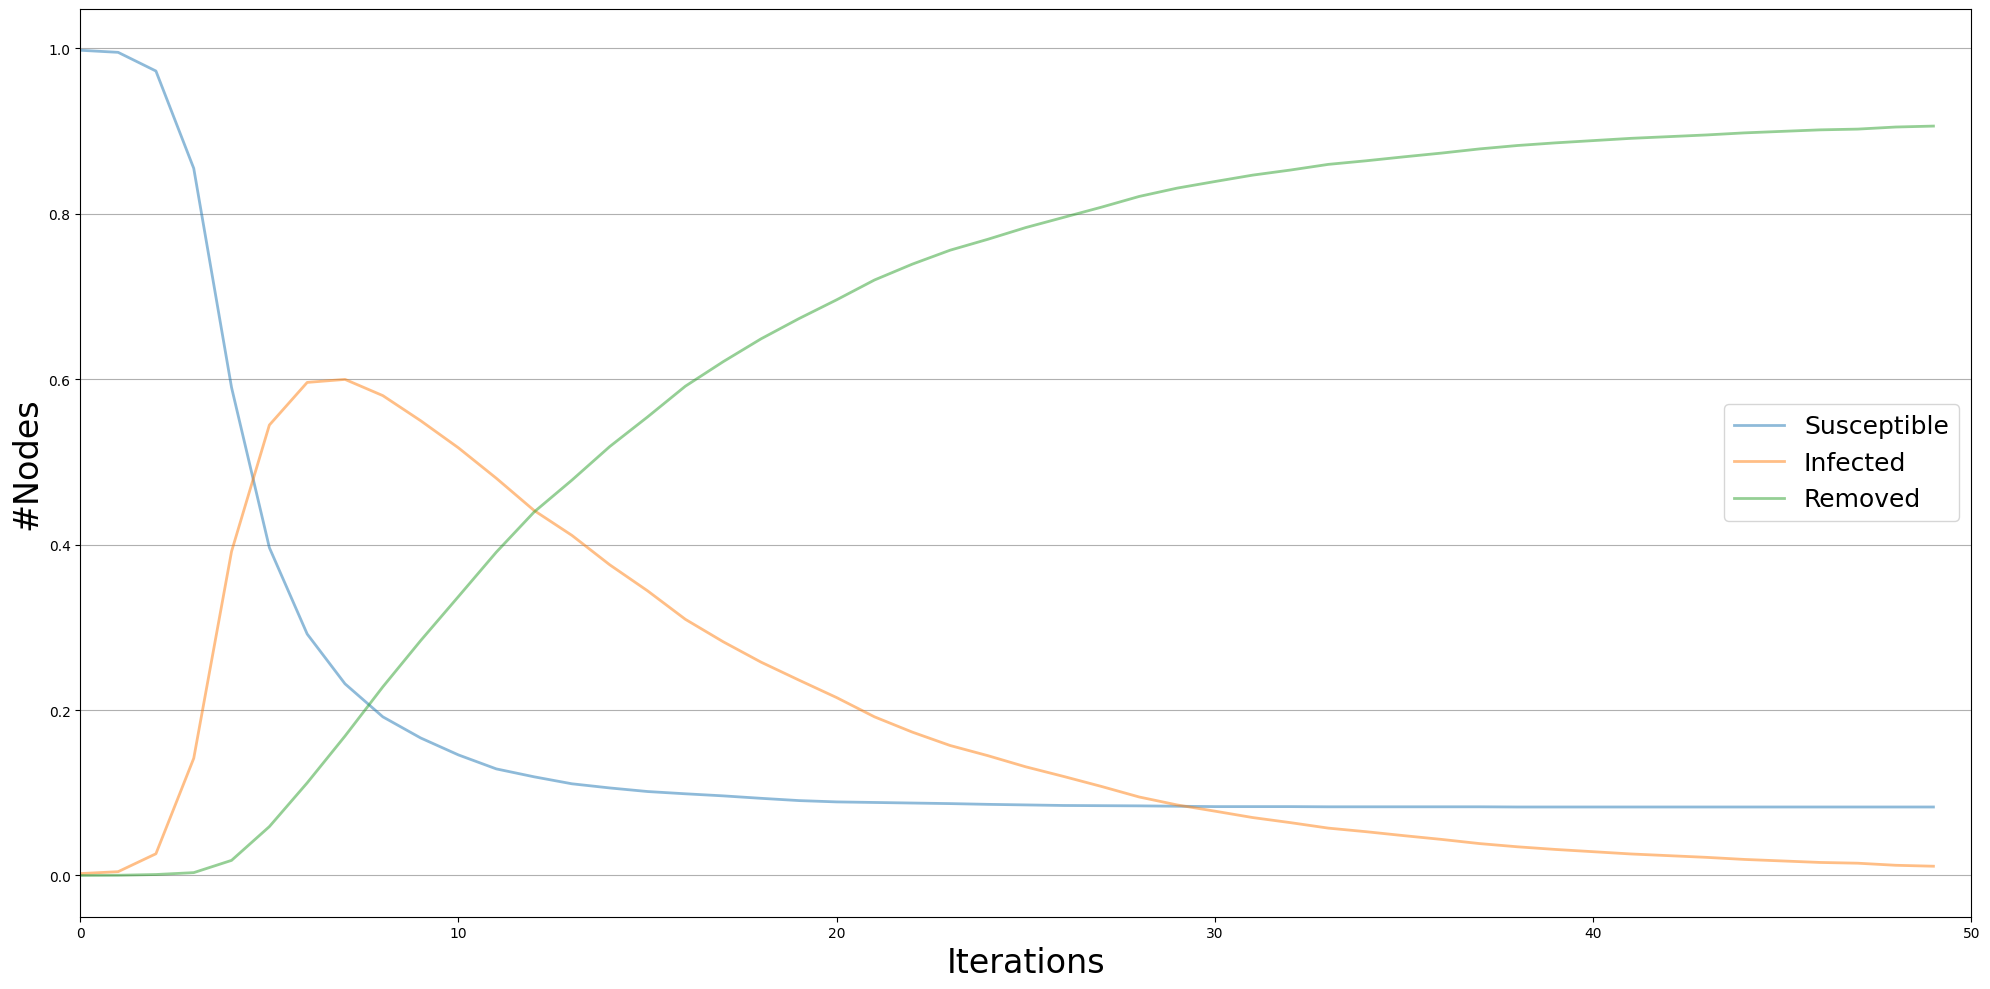

<Figure size 640x480 with 0 Axes>

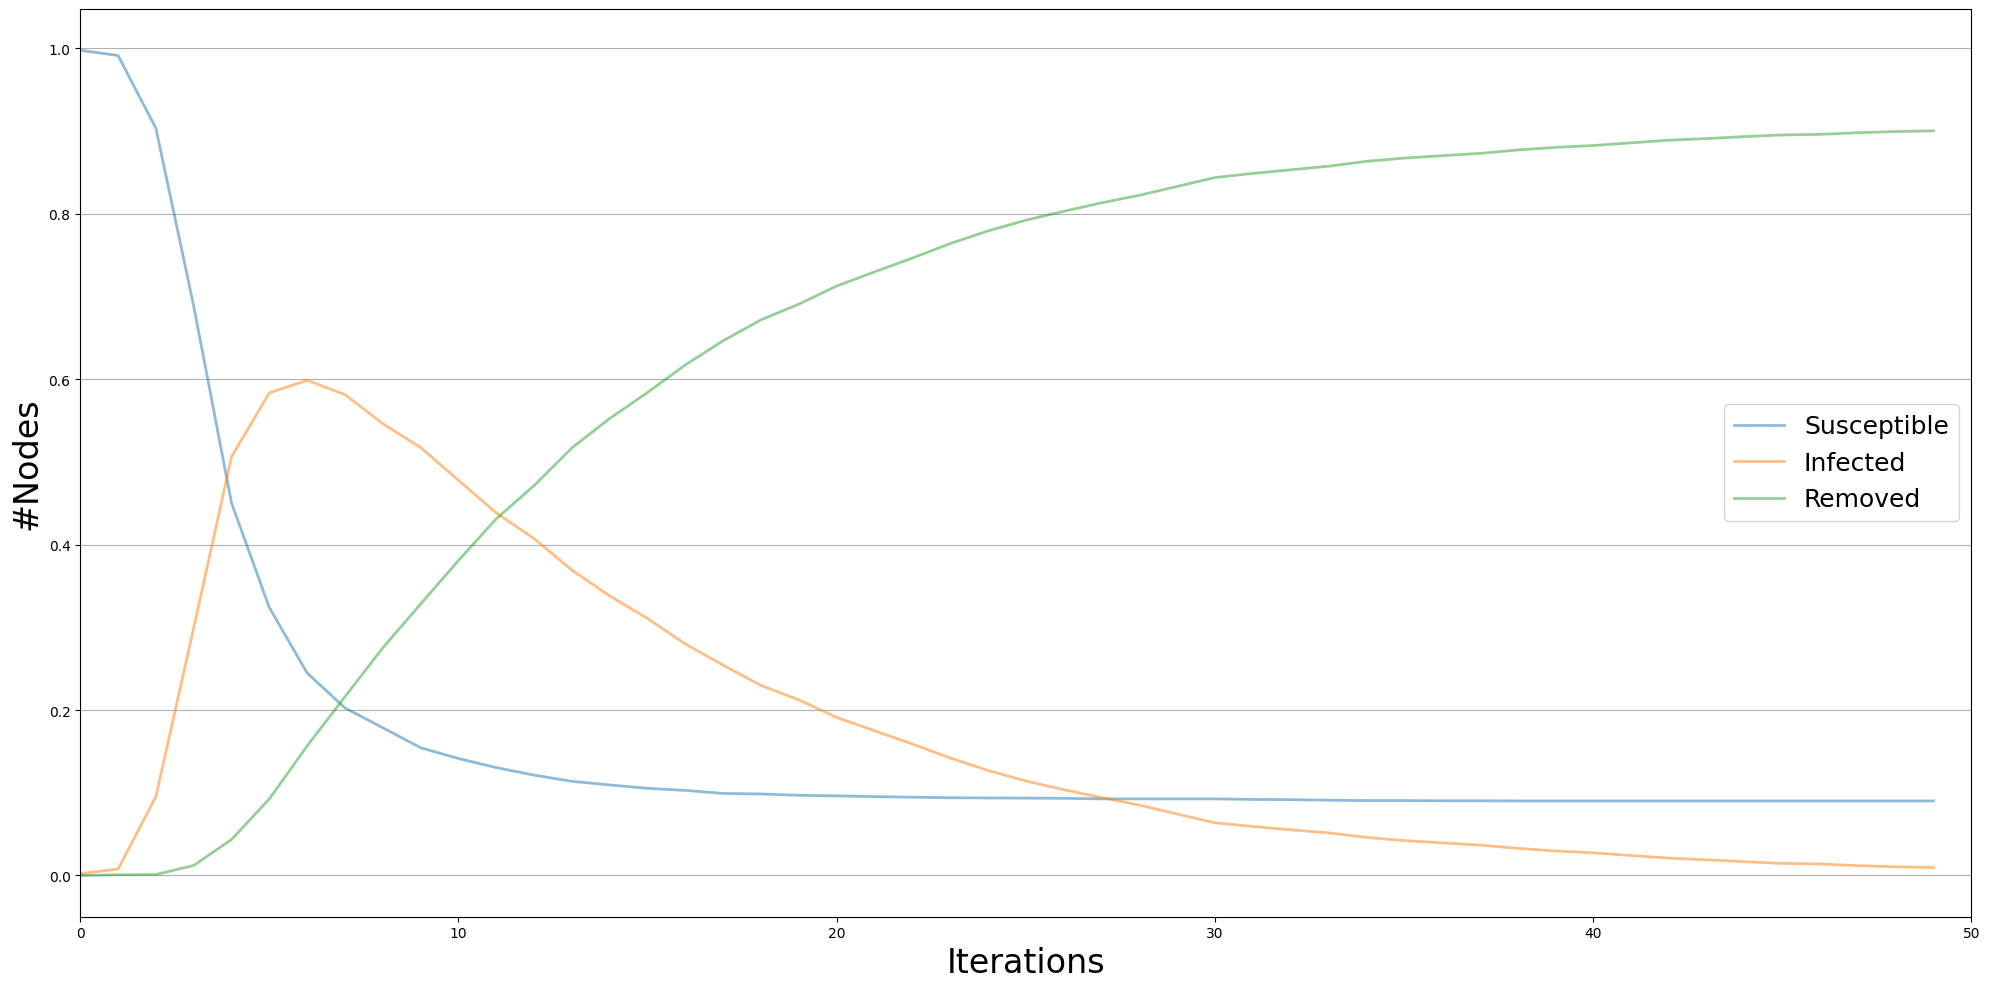

<Figure size 640x480 with 0 Axes>

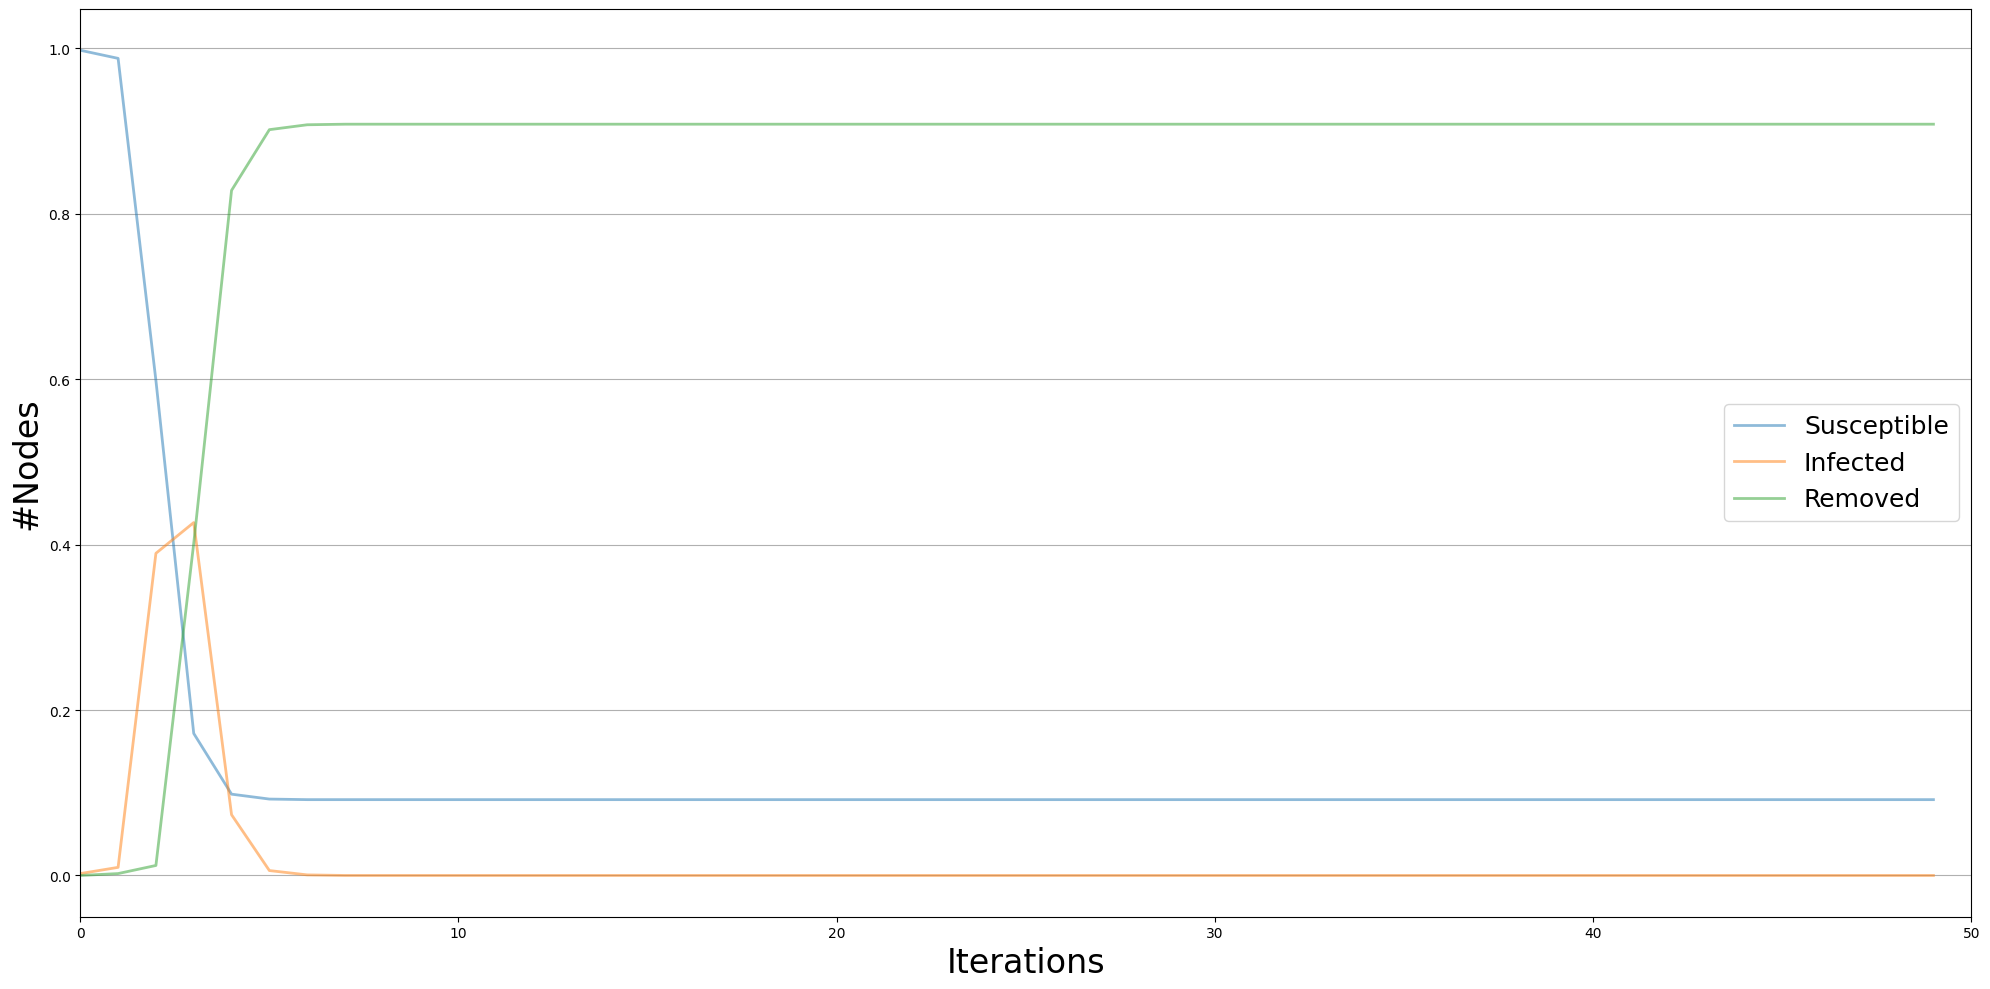

<Figure size 640x480 with 0 Axes>

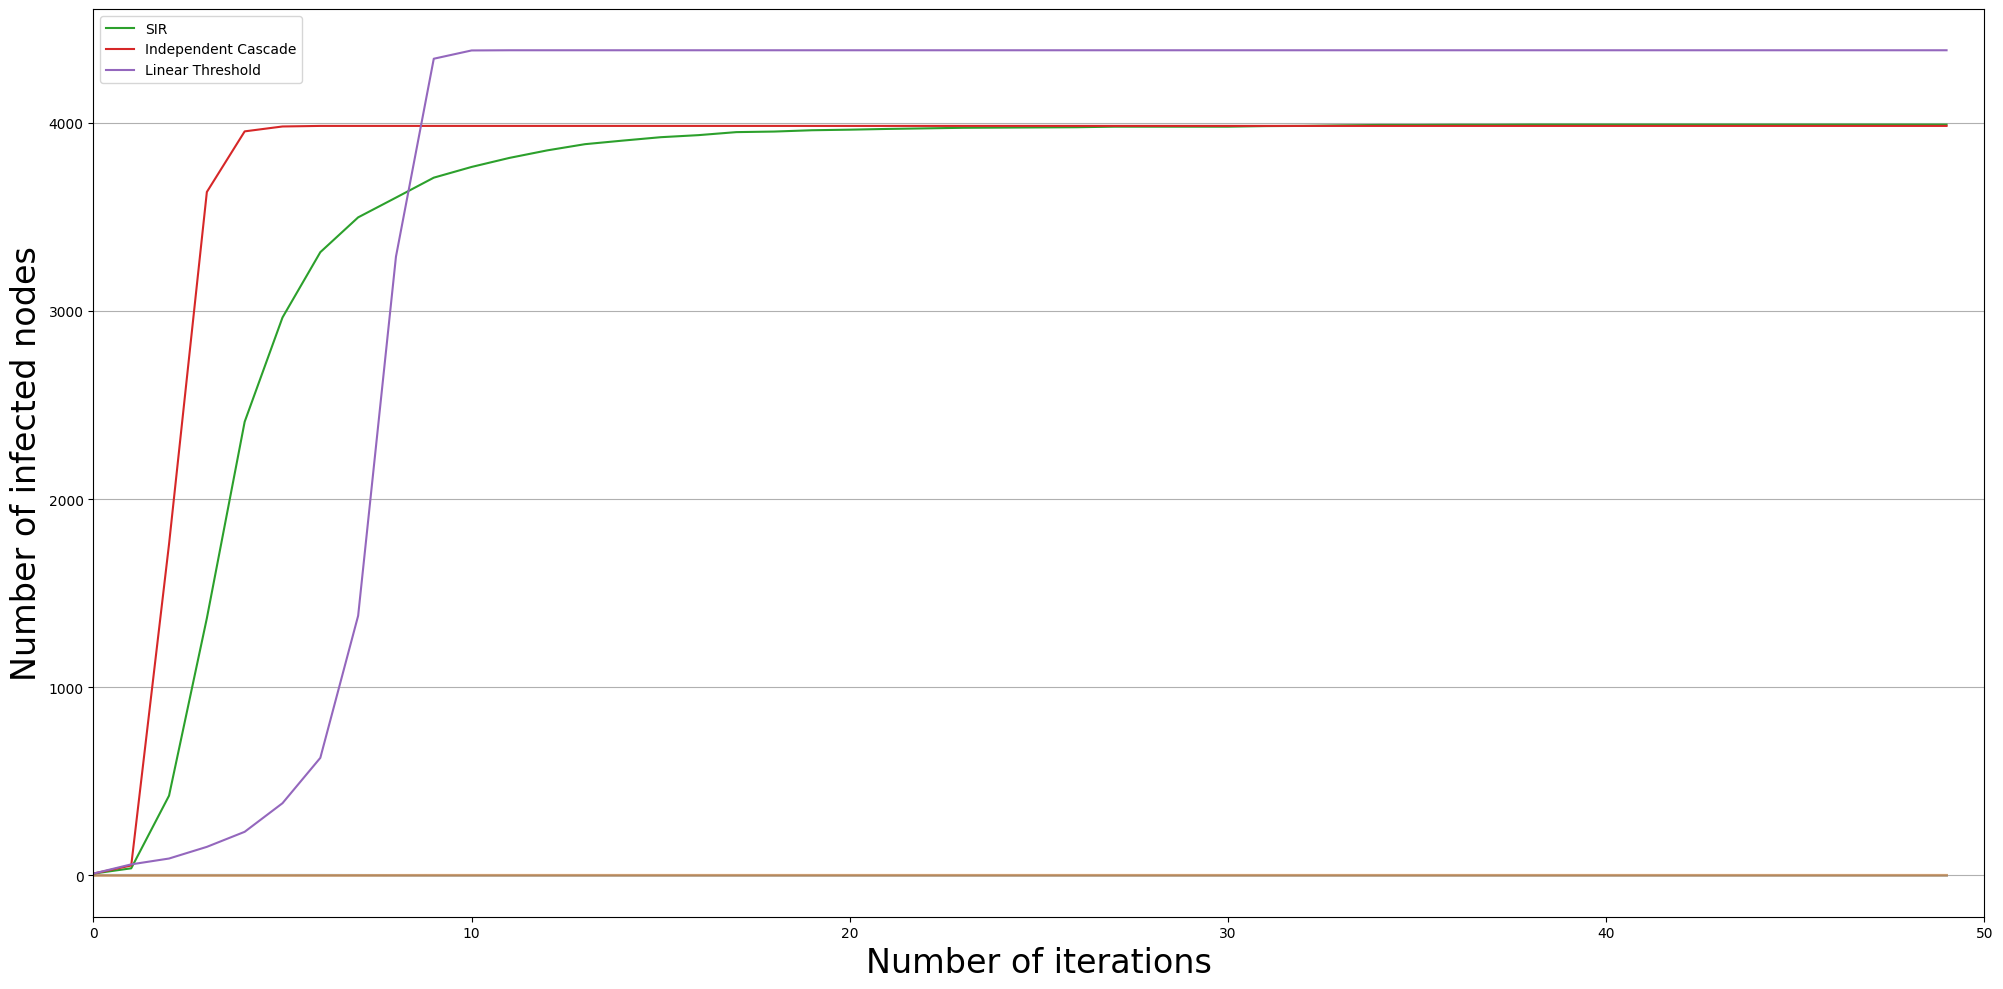

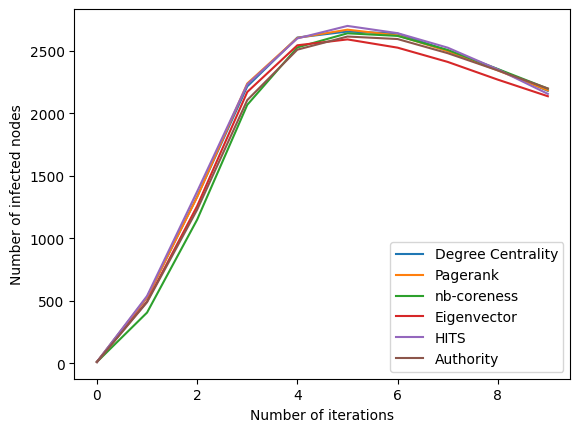

<Figure size 640x480 with 0 Axes>

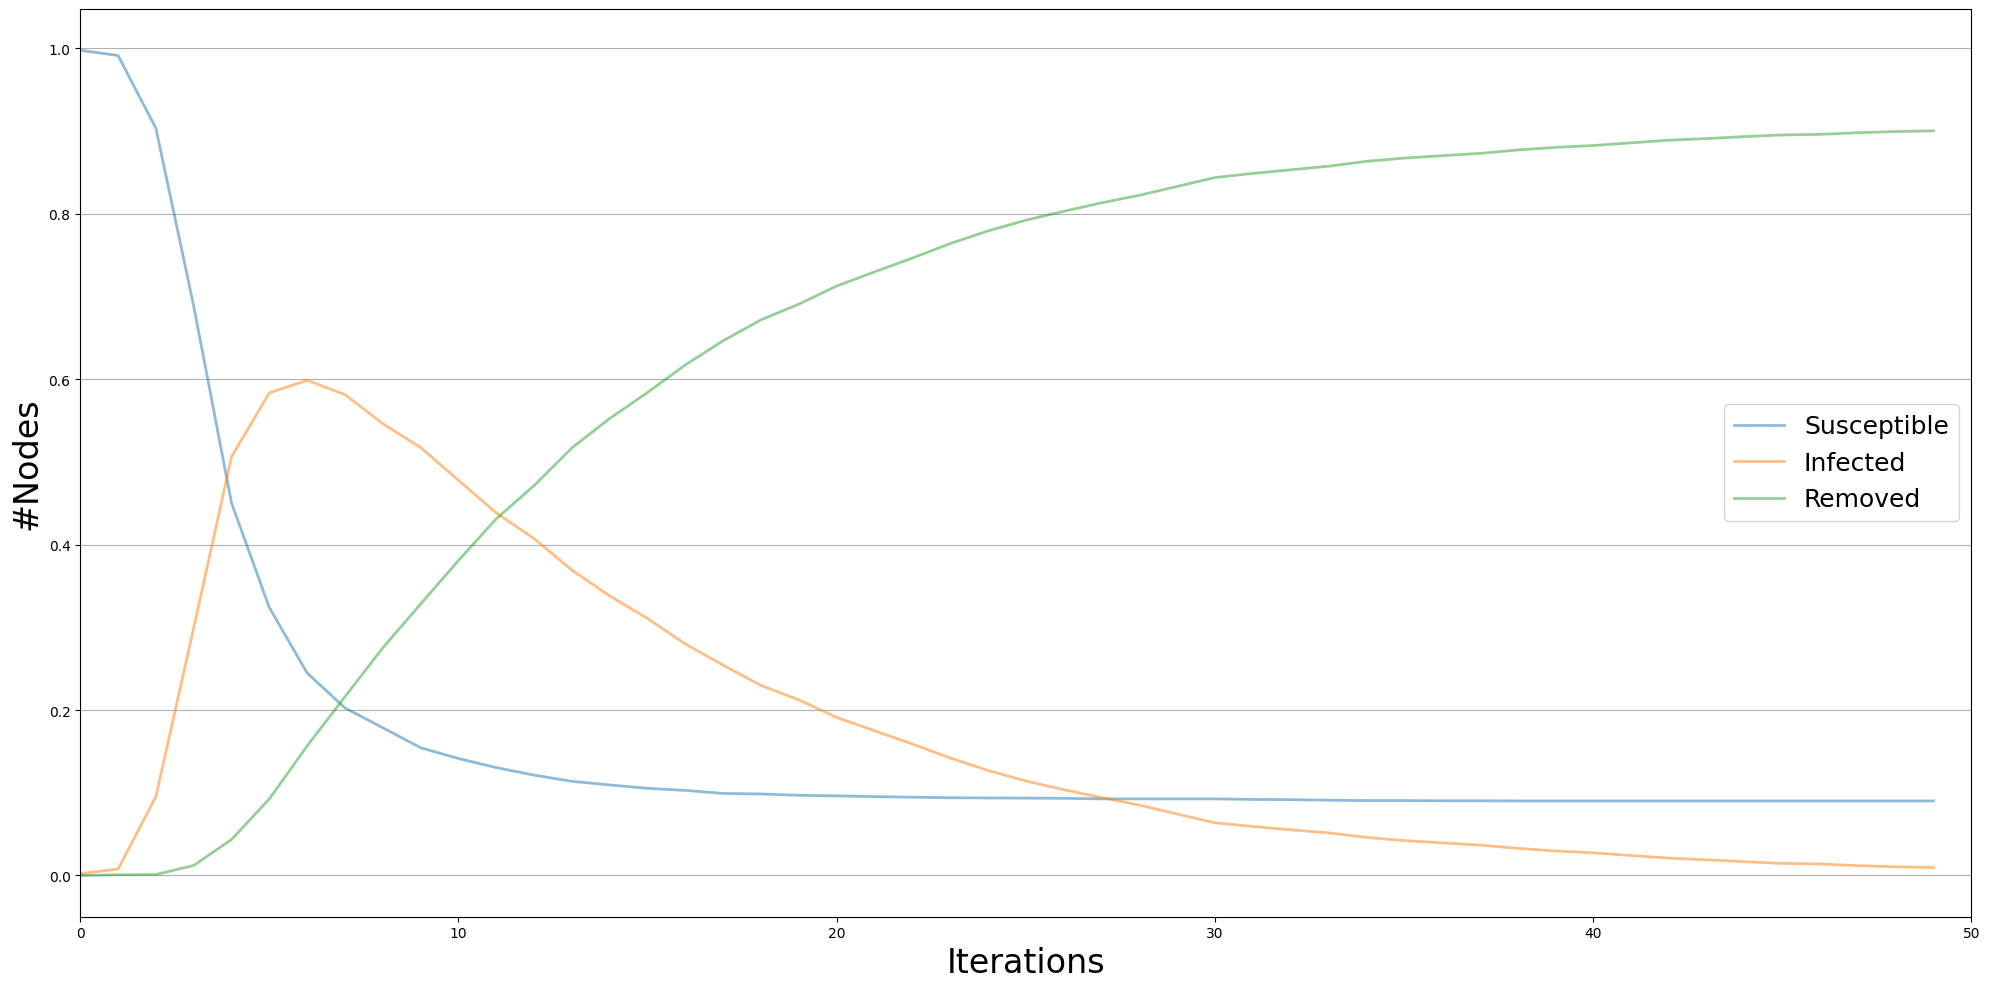

<Figure size 640x480 with 0 Axes>

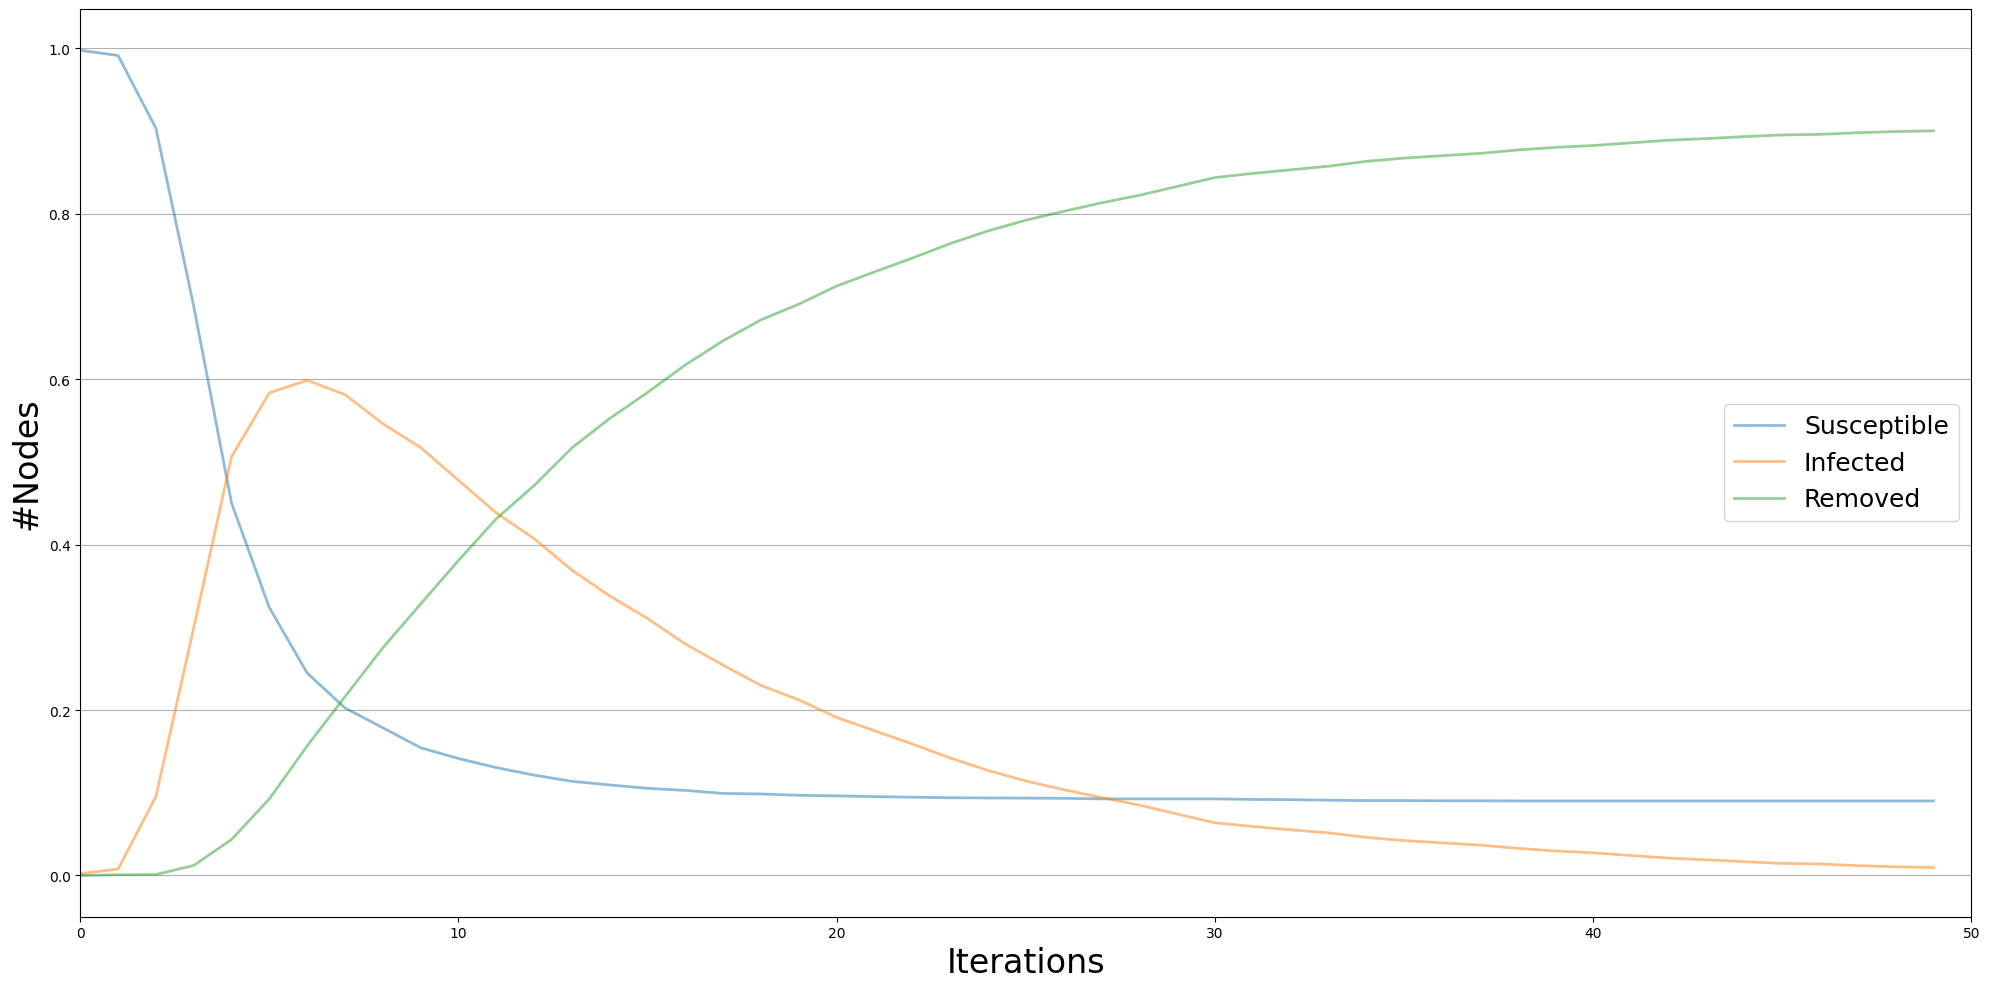

<Figure size 640x480 with 0 Axes>

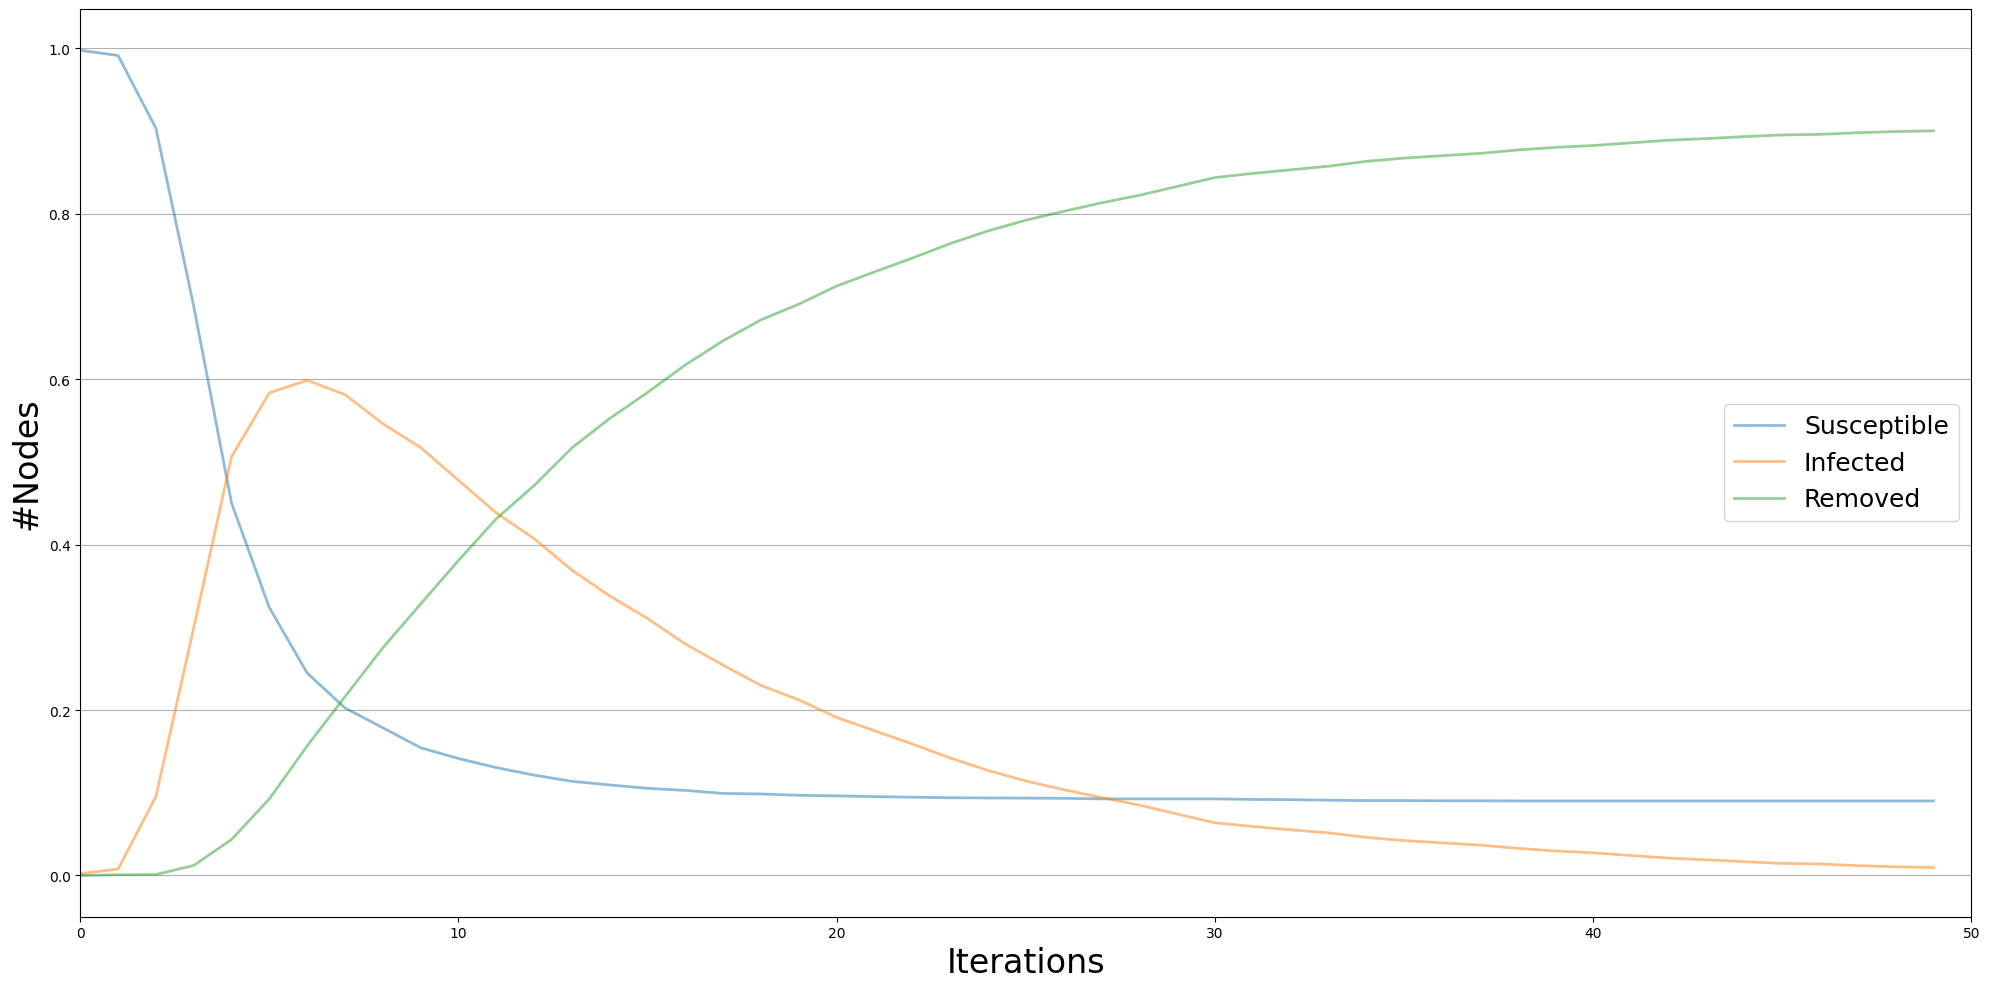

<Figure size 640x480 with 0 Axes>

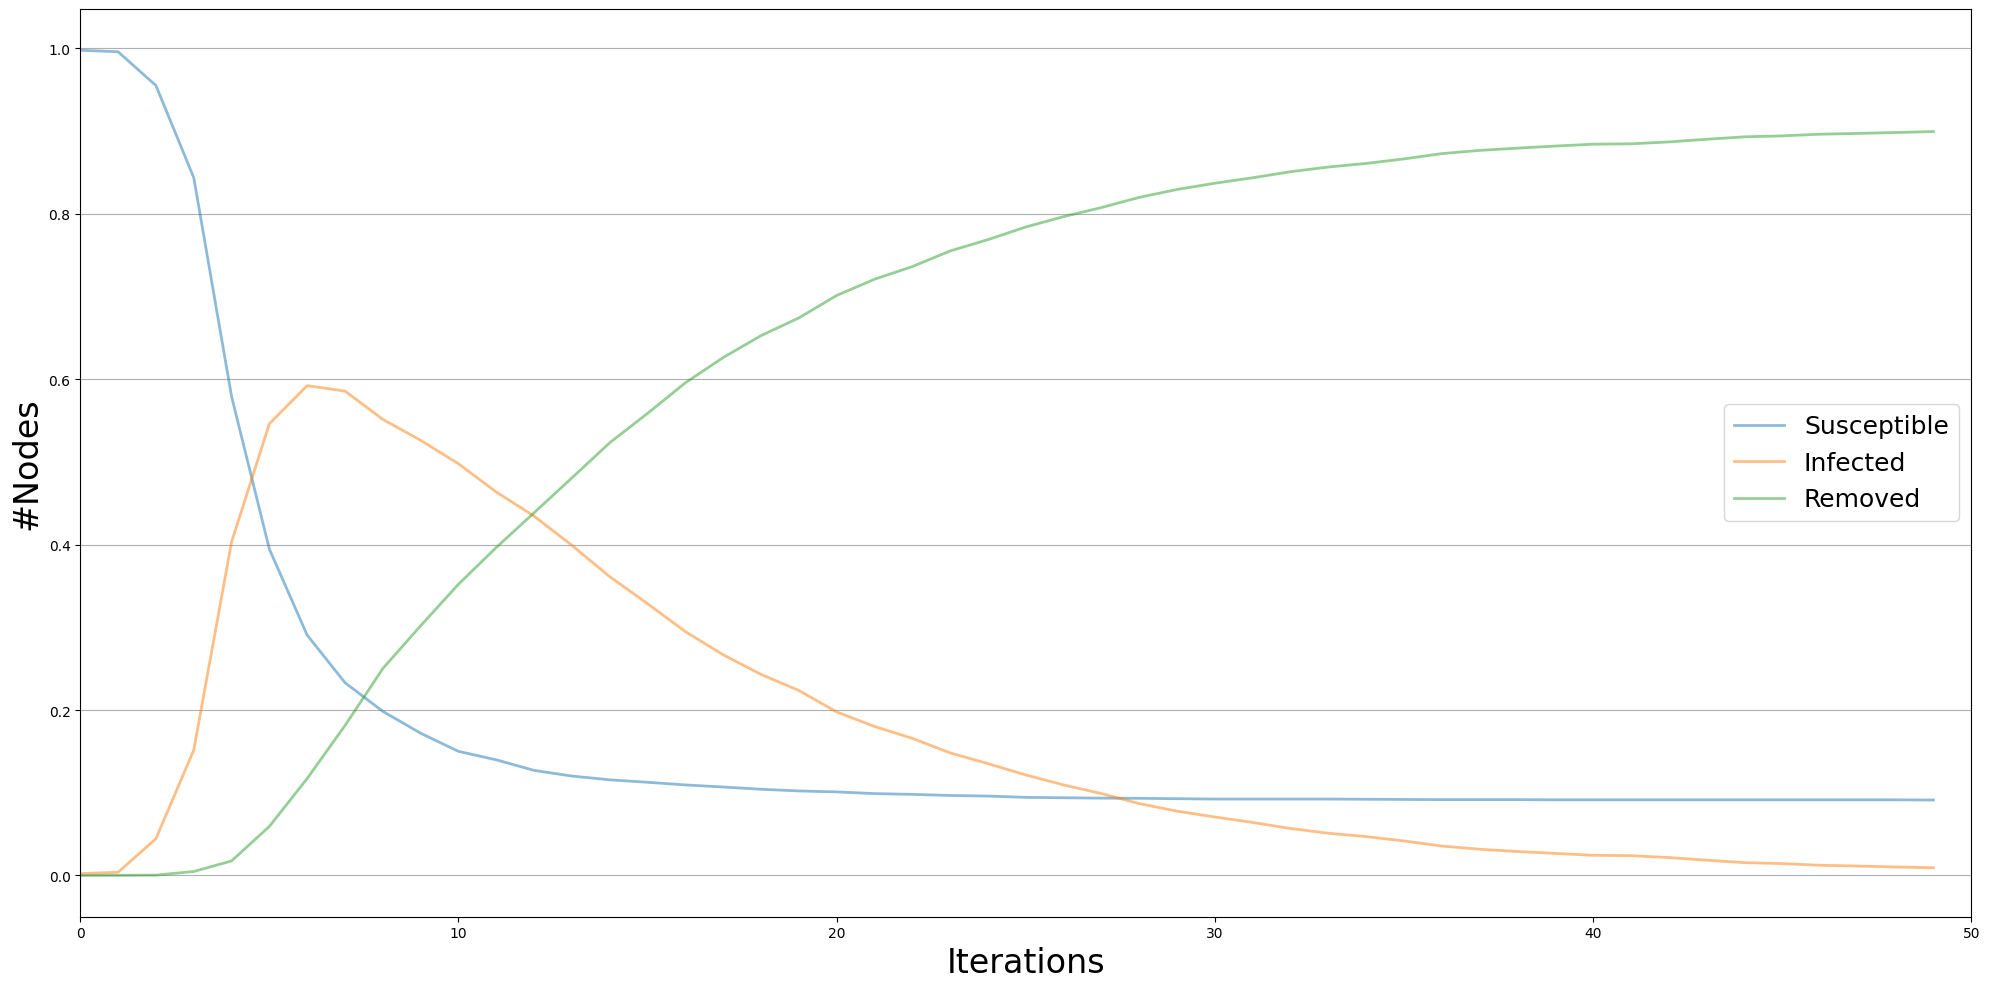

In [40]:
# Plot the progression of the number of susceptible, infected and the recovered nodes
sir_trends = sir_model.build_trends(sir_iterations)
plt.figure()
viz = DiffusionTrend(sir_model, sir_trends)
viz.plot()
plt.show()

## Independent Cascade Models

In [41]:
def independent_cascade(graph, threshold, seed_set):
    """
    The model performing independent cascade simulation
    """
    # Model selection
    model = IndependentCascadesModel(graph)

    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in G.edges():
        config.add_edge_configuration("threshold", edge, threshold)
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)

    # Set the all configuations
    model.set_initial_status(config)
    return model


# Number of steps/iterations
ic_num_steps = 50
# Number of nodes in the seed set
ic_seed_set_size = 10
# Determine the seed set
ic_seed_set = np.random.choice(G.nodes(), ic_seed_set_size)
# Determine the model parameter
ic_threshold = 0.5


# Run the model
ic_model = independent_cascade(graph=G, threshold=ic_threshold, seed_set=ic_seed_set)
ic_iterations = ic_model.iteration_bunch(ic_num_steps)


# Get the number of susceptible, infected and the recovered nodes
# in the last step
print(ic_iterations[-1]["node_count"])

{0: 390, 1: 0, 2: 3995}


<Figure size 640x480 with 0 Axes>

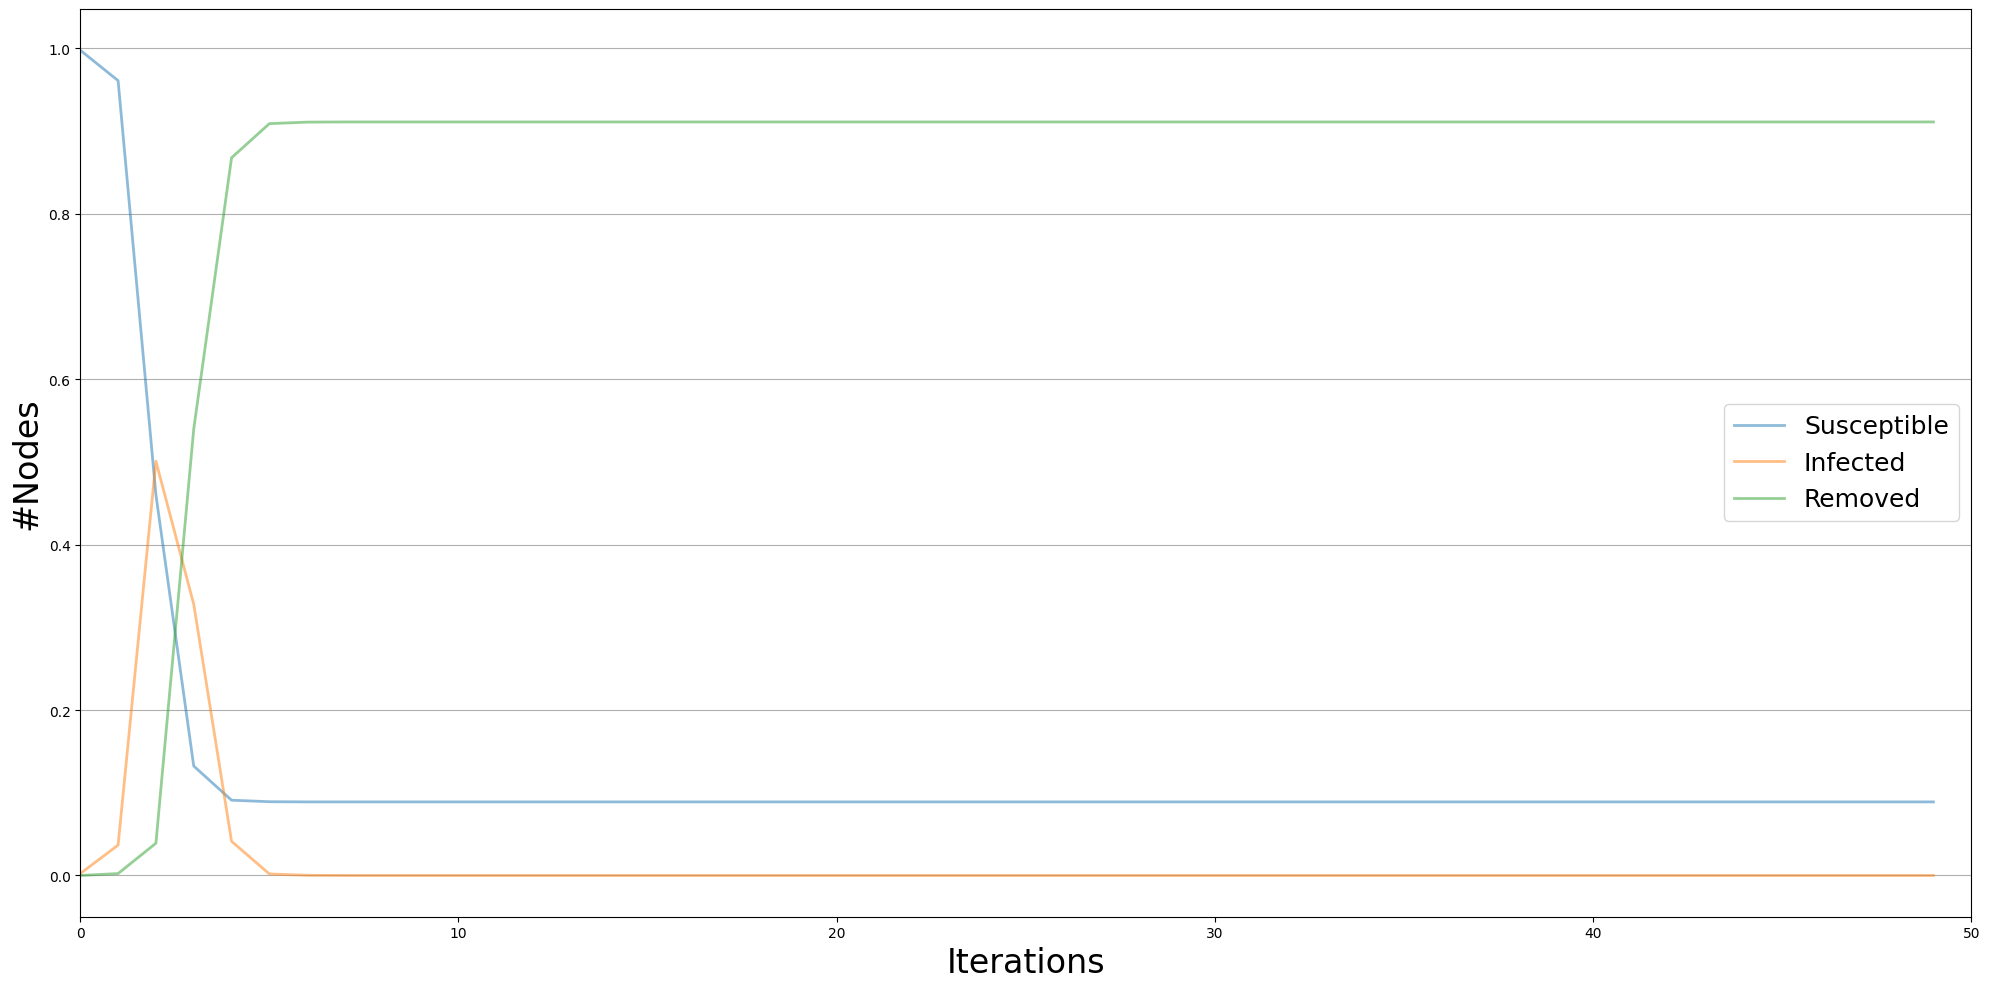

In [42]:
#_Plot the progression of the number of susceptible, infected and
# the recovered nodes
ic_trends = ic_model.build_trends(ic_iterations)
plt.figure()
viz = DiffusionTrend(ic_model, ic_trends)
viz.plot()

## Linear Threshold


In [43]:
def linear_threshold(graph, threshold, seed_set):
    # Model selection
    model = ThresholdModel(graph)

    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in G.edges():
        config.add_edge_configuration("threshold", edge, threshold)
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)

    # Set the all configuations
    model.set_initial_status(config)
    return model


# Number of steps/iterations
lt_num_steps = 50
# Number of nodes in the seed set
lt_seed_set_size = 10
# Determine the seed set
lt_seed_set = np.random.choice(G.nodes(), lt_seed_set_size)
# Determine the model parameter
lt_threshold = 0.1


# Run the model
lt_model = linear_threshold(graph=G, threshold=lt_threshold, seed_set=lt_seed_set)
lt_iterations = lt_model.iteration_bunch(lt_num_steps)


# Get the number of susceptible, infected and the recovered nodes
# in the last step
print(lt_iterations[-1]["node_count"])

{0: 0, 1: 4385}


<Figure size 640x480 with 0 Axes>

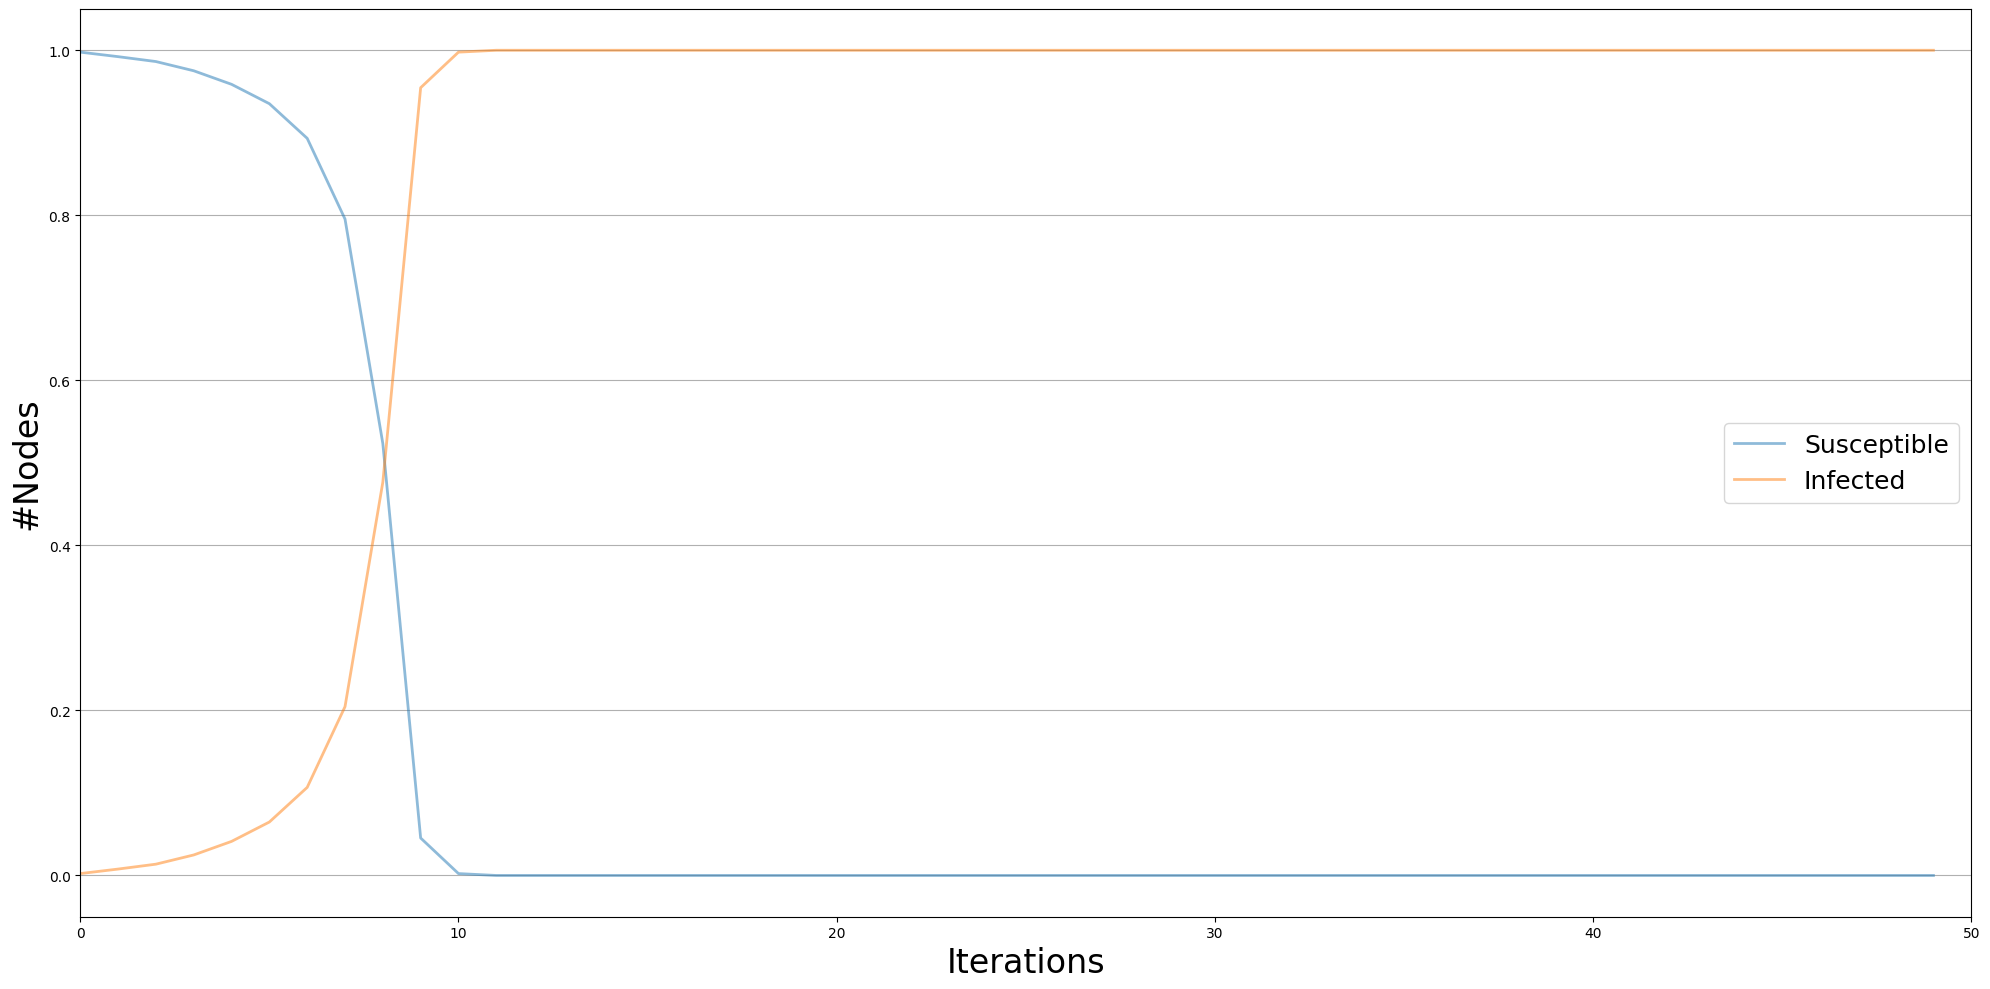

In [44]:
#_Plot the progression of the number of susceptible, infected and
# the recovered nodes
lt_trends = lt_model.build_trends(lt_iterations)
plt.figure()
viz = DiffusionTrend(lt_model, lt_trends)
viz.plot()

**Generalised Threshold**

## Model Comparison

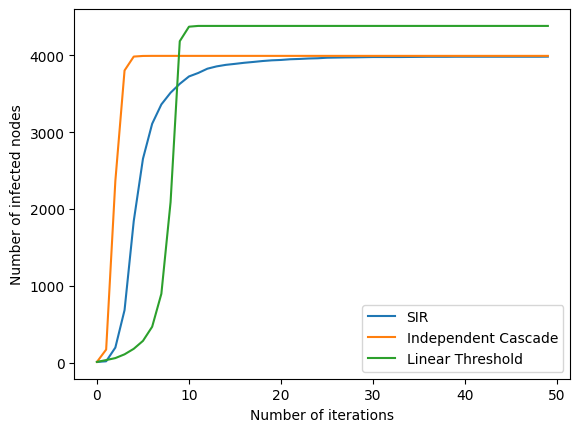

In [45]:
sir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in sir_iterations]
ic_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in ic_iterations]
lt_infected_count = [iteration["node_count"][1] for iteration in lt_iterations]
#sis_infected_count=[iteration["node_count"][1] for iteration in sis_iterations]
#seir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in seir_iterations]
#seirct_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in seirct_iterations]
#seis_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in seis_iterations]
#seisct_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in seisct_iterations]
#swir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in swir_iterations]
plt.xlabel("Number of iterations")
plt.ylabel("Number of infected nodes")
line1, = plt.plot(sir_infected_count, label="SIR")
line2, = plt.plot(ic_infected_count, label="Independent Cascade")
line3, = plt.plot(lt_infected_count, label="Linear Threshold")
#line4, = plt.plot(sis_infected_count, label="SIS")
#line5, = plt.plot(seir_infected_count, label="SEIR(DT)")
#line6, = plt.plot(seirct_infected_count, label="SEIR(CT)")
#line7, = plt.plot(seis_infected_count, label="SEIS(DT)")
#line8, = plt.plot(seisct_infected_count, label="SEIR(CT)")
#line9, = plt.plot(swir_infected_count, label="SWIR")
#plt.legend(handles=[line2, line3, line9])
plt.legend(handles=[line1, line2, line3])
#plt.legend(handles=[line1, line2, line3, line4, line5,line6,line6,line7,line8])
plt.show()

In [46]:
for i in [sir_infected_count, ic_infected_count, lt_infected_count]:
  print(i[-1])

3985
3995
4385


# Part II: Detection of Influential Spreaders

### The Effect of Seed Sets

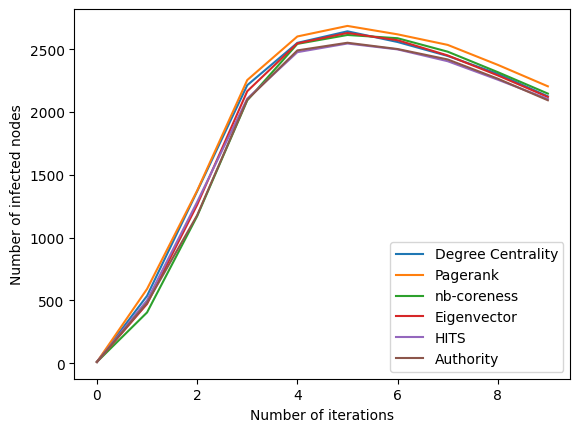

In [47]:
#SIR
import math
# Number of steps/iterations
num_steps = 10
# Number of nodes in the seed set
seed_set_size = 10

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)


    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)



    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)



    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "SIR"  # SIR, LT or IC
threshold = 0.1 # ex: 0.1 for LT, 0.5 for IC model

beta = 0.1 # for SIR
gamma = 0.1 # for SIR
degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)

#                         [np.sum([iteration["node_count"][1]+iteration["node_count"][2]]) for iteration in sir_iterations]
#----------- Plot them
degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [48]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

2125
2205
2147
2120
2104
2094


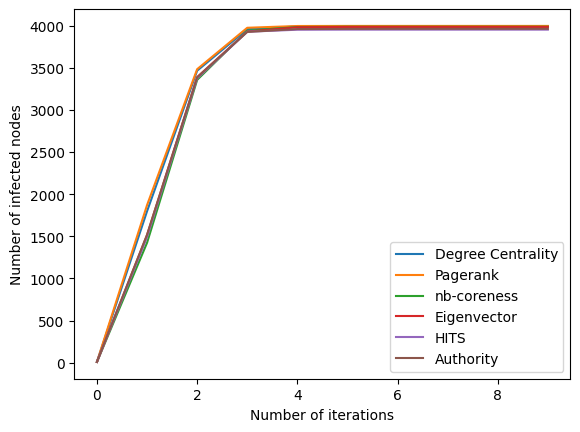

In [49]:
#IC

import math
# Number of steps/iterations
num_steps = 10
# Number of nodes in the seed set
seed_set_size = 10

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)

    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)


    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)


    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "IC"  # SIR, LT or IC
threshold = 0.5 # ex: 0.1 for LT, 0.5 for IC model
beta = 0.1 # for SIR
gamma = 0.1 # for SIR
#degree_iters, pagerank_iters, kcore_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)
degree_iters, pagerank_iters,nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)
#                         [np.sum([iteration["node_count"][1]+iteration["node_count"][2]]) for iteration in sir_iterations]
#----------- Plot them
degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [50]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

3991
3995
3985
3983
3951
3961


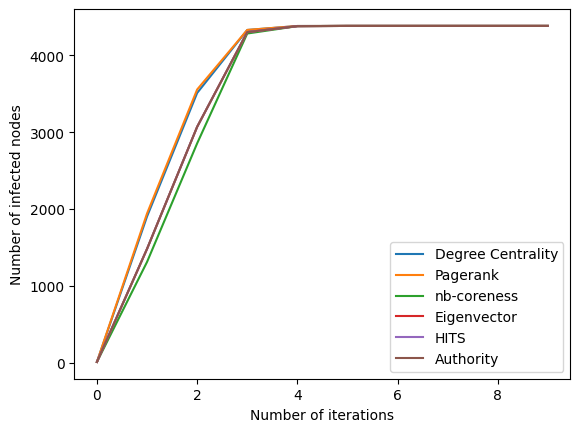

In [51]:
#LT
import math
# Number of steps/iterations
num_steps = 10
# Number of nodes in the seed set
seed_set_size = 10

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)

    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)


    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)


    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "LT"  # SIR, LT or IC
threshold = 0.1 # ex: 0.1 for LT, 0.5 for IC model
beta = 0.1 # for SIR
gamma = 0.1 # for SIR
degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)


degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [53]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

4385
4385
4385
4385
4385
4385
